In [ ]:
Name: Omkar Hulawale
Batch: TE-A3
Roll_No: 13165

Enter the number of vertices:  4
Enter the number of edges:  5


Enter the edges (format: vertex1 vertex2):


 0 1
 0 2
 1 2
 1 3
 2 3
Enter the number of colors:  3
Choose method ('backtracking' or 'branch_and_bound'):  backtracking


Solving using Backtracking...
Assigning color 0 to vertex 0
Assigning color 1 to vertex 1
Assigning color 2 to vertex 2
Assigning color 0 to vertex 3

Final coloring using Backtracking: [0, 1, 2, 0]


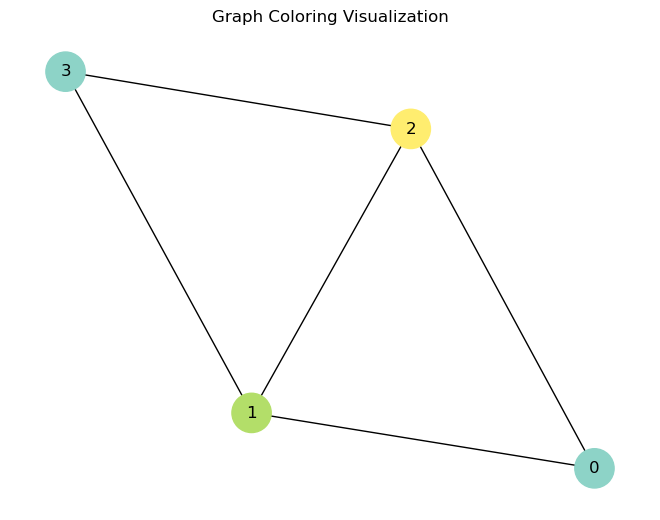


Do you want to run the program again? (y/n):  y
Enter the number of vertices:  4
Enter the number of edges:  5


Enter the edges (format: vertex1 vertex2):


 0 1
 0 2
 1 2
 1 3
 2 3
Enter the number of colors:  3
Choose method ('backtracking' or 'branch_and_bound'):  branch_and_bound


Solving using Branch and Bound...
[B&B] Assigning color 0 to vertex 0
[B&B] Assigning color 1 to vertex 1
[B&B] Assigning color 2 to vertex 2
[B&B] Assigning color 0 to vertex 3

Final coloring using Branch and Bound: [0, 1, 2, 0]


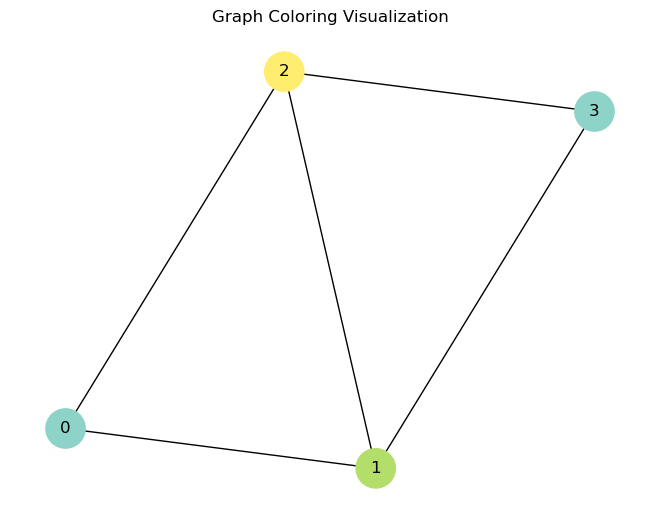


Do you want to run the program again? (y/n):  n


Exiting program. Goodbye!


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphColoring:
    def __init__(self, graph, num_colors):
        self.graph = graph
        self.num_vertices = len(graph)
        self.num_colors = num_colors
        self.colors = [-1] * self.num_vertices

    def is_safe(self, vertex, color):
        for neighbor in self.graph[vertex]:
            if self.colors[neighbor] == color:
                return False
        return True

    def backtrack(self, vertex):
        if vertex == self.num_vertices:
            return True
        for color in range(self.num_colors):
            if self.is_safe(vertex, color):
                self.colors[vertex] = color
                print(f"Assigning color {color} to vertex {vertex}")
                if self.backtrack(vertex + 1):
                    return True
                self.colors[vertex] = -1
                print(f"Backtracking on vertex {vertex}, removing color {color}")
        return False

    def branch_and_bound(self, vertex, color_bound):
        if vertex == self.num_vertices:
            return True
        if color_bound >= self.num_colors:
            return False
        for color in range(self.num_colors):
            if self.is_safe(vertex, color):
                self.colors[vertex] = color
                print(f"[B&B] Assigning color {color} to vertex {vertex}")
                if self.branch_and_bound(vertex + 1, color_bound):
                    return True
                self.colors[vertex] = -1
                print(f"[B&B] Backtracking on vertex {vertex}, removing color {color}")
        return False

    def solve(self, use_branch_and_bound=False):
        if use_branch_and_bound:
            print("Solving using Branch and Bound...")
            if not self.branch_and_bound(0, 0):
                return None
        else:
            print("Solving using Backtracking...")
            if not self.backtrack(0):
                return None
        return self.colors

    def visualize(self):
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for i in range(self.num_vertices):
            for neighbor in self.graph[i]:
                if i < neighbor:
                    G.add_edge(i, neighbor)

        pos = nx.spring_layout(G)
        color_map = [self.colors[i] for i in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=color_map,
                cmap=plt.cm.Set3, node_size=800, font_size=12)
        plt.title("Graph Coloring Visualization")
        plt.show()

def get_graph_from_user():
    num_vertices = int(input("Enter the number of vertices: "))
    edges = int(input("Enter the number of edges: "))
    graph = [[] for _ in range(num_vertices)]

    print("Enter the edges (format: vertex1 vertex2):")
    for _ in range(edges):
        u, v = map(int, input().split())
        graph[u].append(v)
        graph[v].append(u)

    return graph, num_vertices

def main():
    graph, num_vertices = get_graph_from_user()
    num_colors = int(input("Enter the number of colors: "))
    graph_coloring = GraphColoring(graph, num_colors)

    method = input("Choose method ('backtracking' or 'branch_and_bound'): ").strip().lower()
    if method == "backtracking":
        solution = graph_coloring.solve(use_branch_and_bound=False)
        method_used = "Backtracking"
    elif method == "branch_and_bound":
        solution = graph_coloring.solve(use_branch_and_bound=True)
        method_used = "Branch and Bound"
    else:
        print("Invalid method. Please choose 'backtracking' or 'branch_and_bound'.")
        return

    if solution:
        print(f"\nFinal coloring using {method_used}: {solution}")
        graph_coloring.visualize()
    else:
        print(f"No solution found using {method_used}.")

if __name__ == "__main__":
    while True:
        main()
        choice = input("\nDo you want to run the program again? (y/n): ").strip().lower()
        if choice != 'y':
            print("Exiting program. Goodbye!")
            break
